## To-do:
- Transfer references from bookmark tab.
- Add/actually write a README.md.
- add option for case sensitivity.

# Tasks for Fundamentals of Data Analytics Module

My submission for the solutions to the Tasks Assessment. The author is Seán Meade (G00376471@gmit.ie).

***

*Modules can't be used to complete the tasks but the following modules are used to explain certain parts and test our code.*

In [10]:
np.random.binomial(100, .5, 5)

array([57, 50, 53, 51, 50])

Using `np.random.binomial(100, .5, 1000)` I flipped the 'coin' 100 times with each side having a probability of 0.5 and ran this experiment 1000 times. Then using matplotlib I created a histogram to show the numbers of heads in each experiment in ranges.

(array([  3.,  15.,  41., 114., 223., 240., 170., 130.,  44.,  20.]),
 array([34., 37., 40., 43., 46., 49., 52., 55., 58., 61., 64.]),
 <a list of 10 Patch objects>)

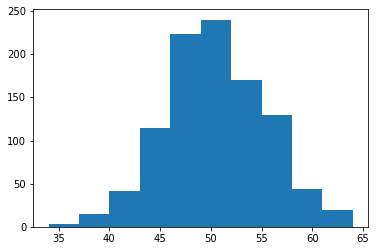

In [3]:
import numpy as np
import matplotlib.pyplot as plt

no_heads = np.random.binomial(100, .5, 1000)
plt.hist(no_heads)

In [120]:
#https://en.wikipedia.org/wiki/Simpson%27s_paradox#:~:text=Simpson's%20paradox%2C%20which%20also%20goes,when%20these%20groups%20are%20combined.
x1 = np.linspace(5, 10, num = 20)
y1 = 2*x1 + 20

In [105]:
x2 = np.linspace(7.5, 12.5, num = 20)
y2 = 2*x2 + 40

In [106]:
x3 = np.linspace(10, 15, num = 20)
y3 = 2*x3 - 60

In [109]:
x4 = np.linspace(12.5, 17.5, num = 20)
y4 = 2*x4 - 80

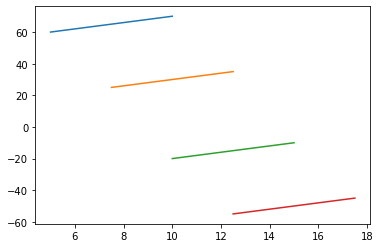

In [110]:
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.show()

In [116]:
x = np.append(x1, [x2, x3, x4])
y = np.append(y1, [y2, y3, y4])

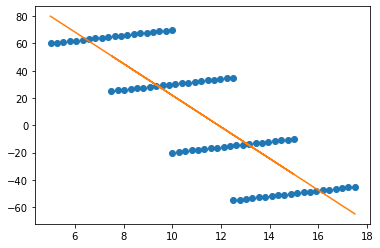

In [117]:
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python

In [118]:
m

-11.593495934959357

**<ins>Task 1</ins>**:
>**October 5th, 2020**: Write a Python function called counts that takes a list as
input and returns a dictionary of unique items in the list as keys and the number of
times each item appears as values. So, the input ['A', 'A', 'B', 'C', 'A']
should have output {'A': 3, 'B': 1, 'C': 1} . Your code should not depend
on any module from the standard library or otherwise. You should research the task
first and include a description with references of your algorithm in the notebook.

#### Introduction

Lists and dictionaries have some things in common. Both are data structures containing one or more data points. You can change and alter both during the execution of a program, otherwise known as being mutable. You can nest both inside a list or a dictionary. Both can be, but do not have to be, homogeneous. Meaning that you can have numbers, strings and Booleans in the same list or dictionary. [1]

| Feature | List | Dictionary |
|---------|------|------------|
| Mutable | Yes  |   Yes      |
| Homogeneous | Yes | Yes |
| Nestable | Yes | Yes |
| Ordered | Yes | No |

The main difference between the two is that lists are ordered, and dictionaries are not. Simply put this means that when you search for `list[0]` it will look up the first element of the list but when you search `dict[0]` it will search for the key value 0 and give you the corresponding value. And that each element in a list has a value but in a dictionary each element has a key and a value.[1]

In [1]:
list = [2, 4, 6, 8, 10, 12, 14]

dictionary = {100: 2, 5: 4, "hi": 6, 0: 8, "x": 10, "f": 12, 8.91: 14}

This means when I use `list[0]` it will return the first element in the list which here is 2

In [2]:
list[0]

2

Where if I search `dictionary[0]` it will return the value with the corresponding key vaue of `0` which in the example above is 8.

In [3]:
dictionary[0]

8

This is an important distinction to make. In our `list` and our `dict` the values are the same. They look to be in the same order (as far as values go) but in fact dictionaries don't have an order. Dictionaries use a pairing system that goes `"key": "value"`. This becomes more intuative if you look at it visually [2].

![Visual Representation of Diction Key: Values](imgs/created/dictionary1.png)

As seen above the key `0` corresponds to the value 8 but this could easily be placed anywhere in the dictionary and still be accessed the same. Now to us it's moved but to Python nothing has changed, `dict[0]` will produce the same value because we haven't changed its key.

![Visual Representation of Diction Key: Values 2](imgs/created/dictionary2.png)

Where as in a list changing the order matters. Take the list above using `list[0]` will return us the value 2.

![Visual Representation of List Positioning](imgs/created/list1.png)

Now if we were to move the 2 value the position (or how we access that value) will change.

![Visual Representation of List Positioning2](imgs/created/list2.png)

Now in order to access the value of 2 we must use `list[3]`.

#### The problem

The problem can be split into three parts. The first determining the unique elements in the list (that will later become our keys). Second the count of each of these within the list and use them as the value of our keys. Lastly we'll have to create the dictionary with or now obtained keys and values.

We'll start with the first half of the problem: collecting our key values. For now we will not be interested in upper and lower case letters so our function will not be case sensetive. We'll create a very simple `testList` to test our code on.

In [6]:
testList = [5, 4, 3, 2, 1, 2, 3, 4, 5, "A", "B", "C", "B"]

We now need to be able to look through our `testList` and pick out the unique elements. So first we need to be able to grab each item in turn. We can do this with the `set()` method. A set in mathematics is "a well-defined collection of distinct objects" [3]. By distinct objects in our terms it means unique elements. So passing a list into `set()` will return a set containing of distinct (or unique) objects (or elements) [4].

In [7]:
set(testList)

{1, 2, 3, 4, 5, 'A', 'B', 'C'}

Next we'll need a way to count how many times each element in the set repeats in our testList. For this the count() method is ideal. It will go through the given list and count how many times the value we pass in is in the list [5, 6].

In [8]:
testList.count(5) # count how many 5s appears in testList

2

Next we'll have to create a dictionary to store our output. Luckily there is the in-built function `dict()`. This can take a key and a value as shown below and will create a dictionary for us [7]. So in the below example `a` and `b` are keys and 2 and 3 are the values.

In [9]:
dictionary = dict(a = 2, b = 3)
dictionary

{'a': 2, 'b': 3}

Now that we understand each step of what must be done we can combine them into one simple line. First we state that the output will be a dictionary by using the `dict()` function. Next, inside the dictionary method our key will be the variable `element` and our value will be the `count()` of that value in the testList (`testList.count(element)`). Lastly we'll create a for loop that will go through the values in the set and count how many times each one appears in the testList[8]. As stated above the set values become our keys and the count of each of these become our values.

In [10]:
dict((element, testList.count(element)) for element in set(testList))

{1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 'C': 1, 'B': 2, 'A': 1}

Now to create a function with the above and call it `counts()` with our input list as a parameter:

In [12]:
def counts(inputList):
    return dict((element, inputList.count(element)) for element in set(inputList))

counts(testList)

{1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 'C': 1, 'B': 2, 'A': 1}

#### Test counts()
One thing our function can't count in a list is a Boolean, or at least there are limitations. Below we have a list of booleans. At first glance the `counts()` function seems to work perfectly on booleans. However it only works for boolean values if we have only booleans in our list or everything else comes before the boolean expressions.

In [15]:
inputList = [False, False, False, True, True, True]

counts(inputList)

{False: 3, True: 3}

Below we can see that it counts the 2s as expected:

In [16]:
inputList = [2, 2, 2, 
             True, True, True, 
             False, False, False]

counts(inputList)

{False: 3, True: 3, 2: 3}

but if we were to add integers after the booleans:

In [17]:
inputList = [2, 2, 2, 
             True, True, True, 
             False, False, False, 
             1, 1, 1]

counts(inputList)

{False: 3, True: 6, 2: 3}

Our function counts the 1s as 1s but also as `True`. The opposite is true for 0s.

In [35]:
inputList = [2, 2, 2, 
             True, True, True, 
             False, False, False, 
             1, 1, 1, 
             0, 0, 0]

counts(inputList)

{False: 6, True: 6, 2: 2, 'a': 2}

In Python 0 is equivalent to `False` and 1 is equivalent to `True`:

In [18]:
0==False

True

In [19]:
1==True

True

Our function seems to work fine with strings.

In [40]:
inputList = ["a", "a", "a", 
             True, True, True, 
             False, False, False,
             "b", "b", "b"]

counts(inputList)

{False: 3, True: 3, 'b': 3, 'a': 3}

There is also the senario of case sensitivity. What if we wanted to make it so `"b"` and `"B"` were counted as the same thing. Could we add something to our function to add this feature? 

We can do this by setting a case sensitivity variable. If it's true it loops through the list and checks for strings [9] and converts them all to lower case [10]. Then runs as normal.

In [101]:
inputList= ["HI", "HI", "hi", "hi", "go", "go", "Go", 2]

def counts(inputList, caseSensitivity=True):
    
    if caseSensitivity==False:
        for i in range(0, len(inputList)):
            if isinstance(inputList[i], str):
                inputList[i] = inputList[i].lower()    
    
    return dict((element, inputList.count(element)) for element in set(inputList)) 

counts(inputList, False)

{'hi': 4, 2: 1, 'go': 3}

## Task 2



In [1]:
import numpy as np
# k = number of dice, n = number of rolls
def dicerolls(k):
    number = [1, 2, 3, 4, 5, 6]
    rng = np.random.default_rng()
    roll = rng.choice([1, 2, 3, 4 ,5, 6], k)
    quantity = []
    faceval = 0
    for i in range(0, k):
        faceval = faceval + roll[i]
    quantity.append()
    

In [2]:
dicerolls(2)

TypeError: append() takes exactly one argument (0 given)

In [5]:
def counts(inputList, caseSensitivity=True):
    
    if caseSensitivity==False:
        for i in range(0, len(inputList)):
            if isinstance(inputList[i], str):
                inputList[i] = inputList[i].lower()    
    
    return dict((element, inputList.count(element)) for element in set(inputList)) 

A fair die gives an equal chance for each side to be rolled. NumPys random number generated function `choice` takes a range of numbers to choose from as its first parameter (below the array `number`) and the number of choices to make (below the variable `k`). With no other parameters `choice` will fairly choose one (each number is as likely to be chosen as the rest). 

So I create the array of choices `number`, an empty array to hold the rolls of the two die 'rolls'. Then I 'roll' the die and add their values together for the number of times specified as `n`. Each of the `n` rolls is summed and added to the `rolls` list. `k` controls how many die are being rolled each time. Then I use the previously created `counts` method to show the how many times each value appears in the `n` number of trials.

In [11]:
def dicerolls(k, n):
    number = [1, 2, 3, 4, 5, 6]
    rng = np.random.default_rng()
    rolls = []
    for i in range(n):
        roll = sum(rng.choice(number, k))
        rolls.append(roll)    
    outcome = counts(rolls)
    print(outcome)

In [12]:
dicerolls(2, 100)

{3: 8, 4: 11, 5: 12, 6: 12, 7: 14, 8: 19, 9: 12, 10: 8, 11: 2, 12: 2}


In [15]:
rng = np.random.default_rng()
rng.choice([1, 2, 3, 4, 5, 6], 2)

array([4, 6])

# References:

[1] John Sturtz, "Dictionaries in Python", https://realpython.com/python-dicts/

[2] sthurlow.com, "Tuples, Lists, and Dictionaries", http://sthurlow.com/python/lesson06/ 

[3] Wikipedia, "Set (mathematics)", https://en.wikipedia.org/wiki/Set_(mathematics)

[4] programiz.com, "Python Sets", https://www.programiz.com/python-programming/set

[5] Georgy, "Answer to: How can I count the occurrences of a list item?", https://stackoverflow.com/questions/2600191/how-can-i-count-the-occurrences-of-a-list-item

[6] w3schools.com, "Python List count() Method", https://www.w3schools.com/python/ref_list_count.asp

[7] w3schools.com, "Python dict() Function", https://www.w3schools.com/python/ref_func_dict.asp

[8] user2314737, "Answer to: How can I count the occurrences of a list item?", https://stackoverflow.com/questions/2600191/how-can-i-count-the-occurrences-of-a-list-item

[9] Sven Marnach, "Answer to: How to check if type of a variable is string?", https://stackoverflow.com/questions/4843173/how-to-check-if-type-of-a-variable-is-string

[10] YOU, "Answer to: Convert a Python list with strings all to lowercase or uppercase", https://stackoverflow.com/questions/1801668/convert-a-python-list-with-strings-all-to-lowercase-or-uppercase